In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
import segmentation_models as sm
import glob
import cv2
import os
import numpy as np
sm.set_framework('tf.keras')
sm.framework()

Segmentation Models: using `keras` framework.


'tf.keras'

In [15]:
back_bone = "resnet34"
back_bone2 = "resnet50"
back_bone3 = "vgg16"
preprocess_input = sm.get_preprocessing(back_bone)

SIZE_X = 256
SIZE_Y = 256

In [3]:
train_images = []

for directory_path in glob.glob("Work images"):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        # train_labels.append(label)
# Convert list to array for machine learning processing
train_images = np.array(train_images)

In [4]:
train_images.shape 

(168, 256, 256, 3)

In [5]:
train_masks = []
for directory_path in glob.glob("Work mask images"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)
        mask = cv2.resize(mask, (SIZE_Y, SIZE_X))
        #mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
        train_masks.append(mask)
        # train_labels.append(label)
# Convert list to array for machine learning processing
train_masks = np.array(train_masks)

In [6]:
train_masks .shape 

(168, 256, 256)

In [7]:
X = train_images
Y = train_masks

# print(X.shape)
# print(Y.shape)
#Y = np.expand_dims(Y, axis=3)

x_train, x_val, y_train, y_val = train_test_split(
    X, Y, test_size=0.3, random_state=42)

In [17]:
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)


model = sm.Unet(back_bone3, encoder_weights='imagenet')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])


In [18]:
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/10
4/4 [==============================] - 145s 32s/step - loss: -23.6808 - mse: 13540.5479 - val_loss: -758.8613 - val_mse: 14737.7363
Epoch 2/10
4/4 [==============================] - 125s 31s/step - loss: -70.9147 - mse: 13528.4785 - val_loss: -702.5283 - val_mse: 14738.1494
Epoch 3/10
4/4 [==============================] - 124s 31s/step - loss: -107.8243 - mse: 13521.7227 - val_loss: -800.5322 - val_mse: 14737.5781
Epoch 4/10
4/4 [==============================] - 125s 31s/step - loss: -143.4013 - mse: 13517.8389 - val_loss: -749.4574 - val_mse: 14738.0781
Epoch 5/10
4/4 [==============================] - 125s 31s/step - loss: -182.9596 - mse: 13514.4727 - val_loss: -784.2391 - val_mse: 14737.8750
Epoch 6/10
4/4 [==============================] - 127s 32s/step - loss: -221.3293 - mse: 13512.4023 - val_loss: -806.1512 - val_mse: 14737.6865
Epoch 7/10
4/4 [==============================] - 125s 31s/step - loss: -258.8860 - mse: 13511.7881 - val_loss: -810.1211 - val_mse: 14737

In [19]:
model.save('model_weights_vgg16.h5')

In [20]:
model = keras.models.load_model('model_weights_vgg16.h5', compile=False)

test_img = cv2.imread('test_image.jpg', cv2.IMREAD_COLOR)
test_img = cv2.resize(test_img, (256, 256))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)


In [21]:
prediction = model.predict(test_img)

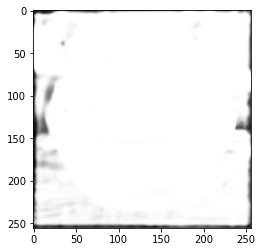

In [22]:
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
#plt.imsave('output.jpg', prediction_image, cmap='gray')


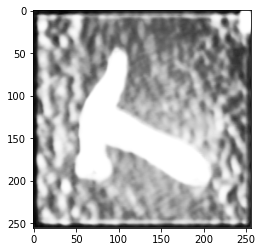

In [24]:
test_img = cv2.imread('test_image2.jpg', cv2.IMREAD_COLOR)
test_img = cv2.resize(test_img, (256, 256))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)
predic = model.predict(test_img)
prediction_img = predic.reshape(mask.shape)
plt.imshow(prediction_img, cmap = 'gray')

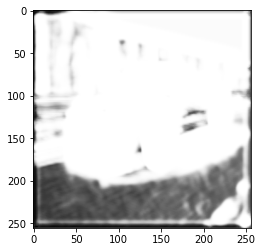

In [25]:
test_img = cv2.imread('test_image3.jpg', cv2.IMREAD_COLOR)
test_img = cv2.resize(test_img, (256, 256))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)
predic = model.predict(test_img)
prediction_img = predic.reshape(mask.shape)
plt.imshow(prediction_img, cmap = 'gray')

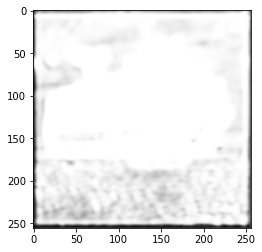

In [26]:
test_img = cv2.imread('Test_image4.jpg', cv2.IMREAD_COLOR)
test_img = cv2.resize(test_img, (256, 256))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)
predic = model.predict(test_img)
prediction_img = predic.reshape(mask.shape)
plt.imshow(prediction_img, cmap = 'gray')